## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3         X4            Y
0  13.032721  1437.326406  0.961450  10.786909  1381.737307
1  21.495914   949.491041  0.432986   3.636503   411.832523
2   7.590142  1521.517258  0.549296   9.819413   835.688305
3  12.943446  1109.383266  0.281748   2.993891   312.862212
4  97.980406   742.133141  0.562837   8.091947   428.915087


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9915299	total: 68.6ms	remaining: 1m 8s
1:	learn: 0.9804912	total: 69.1ms	remaining: 34.5s
2:	learn: 0.9704094	total: 69.7ms	remaining: 23.2s
3:	learn: 0.9600073	total: 70.2ms	remaining: 17.5s
4:	learn: 0.9454387	total: 70.6ms	remaining: 14.1s
5:	learn: 0.9344055	total: 71.2ms	remaining: 11.8s
6:	learn: 0.9232587	total: 71.7ms	remaining: 10.2s
7:	learn: 0.9099476	total: 72.2ms	remaining: 8.95s
8:	learn: 0.8996149	total: 72.7ms	remaining: 8s
9:	learn: 0.8877308	total: 73.2ms	remaining: 7.24s
10:	learn: 0.8771246	total: 73.7ms	remaining: 6.62s
11:	learn: 0.8639504	total: 74.2ms	remaining: 6.11s
12:	learn: 0.8513321	total: 74.7ms	remaining: 5.67s
13:	learn: 0.8389025	total: 75.3ms	remaining: 5.3s
14:	learn: 0.8287659	total: 75.8ms	remaining: 4.97s
15:	learn: 0.8191756	total: 76.2ms	remaining: 4.69s
16:	learn: 0.8067620	total: 76.7ms	remaining: 4.43s
17:	learn: 0.7991081	total: 77.1ms	remaining: 4.21s
18:	learn: 0.7910803	total: 77.5ms	remaining: 4s

95:	learn: 0.3376423	total: 109ms	remaining: 1.02s
96:	learn: 0.3338681	total: 109ms	remaining: 1.02s
97:	learn: 0.3306864	total: 110ms	remaining: 1.01s
98:	learn: 0.3265216	total: 110ms	remaining: 1s
99:	learn: 0.3224056	total: 110ms	remaining: 993ms
100:	learn: 0.3196064	total: 111ms	remaining: 985ms
101:	learn: 0.3165334	total: 111ms	remaining: 978ms
102:	learn: 0.3135059	total: 112ms	remaining: 971ms
103:	learn: 0.3111641	total: 112ms	remaining: 965ms
104:	learn: 0.3074025	total: 112ms	remaining: 958ms
105:	learn: 0.3043188	total: 113ms	remaining: 951ms
106:	learn: 0.3010030	total: 113ms	remaining: 946ms
107:	learn: 0.2975497	total: 114ms	remaining: 941ms
108:	learn: 0.2948134	total: 114ms	remaining: 935ms
109:	learn: 0.2916430	total: 115ms	remaining: 930ms
110:	learn: 0.2888207	total: 115ms	remaining: 924ms
111:	learn: 0.2861018	total: 116ms	remaining: 918ms
112:	learn: 0.2834124	total: 116ms	remaining: 912ms
113:	learn: 0.2799216	total: 117ms	remaining: 907ms
114:	learn: 0.277492

283:	learn: 0.0806156	total: 186ms	remaining: 469ms
284:	learn: 0.0803090	total: 187ms	remaining: 468ms
285:	learn: 0.0797927	total: 187ms	remaining: 467ms
286:	learn: 0.0794245	total: 187ms	remaining: 466ms
287:	learn: 0.0789184	total: 188ms	remaining: 464ms
288:	learn: 0.0783311	total: 188ms	remaining: 463ms
289:	learn: 0.0779822	total: 189ms	remaining: 462ms
290:	learn: 0.0776923	total: 189ms	remaining: 461ms
291:	learn: 0.0773661	total: 190ms	remaining: 460ms
292:	learn: 0.0770506	total: 190ms	remaining: 458ms
293:	learn: 0.0768000	total: 190ms	remaining: 457ms
294:	learn: 0.0765368	total: 191ms	remaining: 456ms
295:	learn: 0.0759733	total: 191ms	remaining: 455ms
296:	learn: 0.0754111	total: 192ms	remaining: 453ms
297:	learn: 0.0751021	total: 192ms	remaining: 452ms
298:	learn: 0.0748102	total: 192ms	remaining: 451ms
299:	learn: 0.0745728	total: 192ms	remaining: 449ms
300:	learn: 0.0742934	total: 193ms	remaining: 448ms
301:	learn: 0.0739830	total: 193ms	remaining: 447ms
302:	learn: 

526:	learn: 0.0248729	total: 290ms	remaining: 261ms
527:	learn: 0.0247444	total: 291ms	remaining: 260ms
528:	learn: 0.0246080	total: 291ms	remaining: 259ms
529:	learn: 0.0244922	total: 292ms	remaining: 259ms
530:	learn: 0.0243667	total: 292ms	remaining: 258ms
531:	learn: 0.0242428	total: 293ms	remaining: 257ms
532:	learn: 0.0241305	total: 293ms	remaining: 257ms
533:	learn: 0.0240566	total: 293ms	remaining: 256ms
534:	learn: 0.0239365	total: 294ms	remaining: 255ms
535:	learn: 0.0238277	total: 294ms	remaining: 255ms
536:	learn: 0.0237025	total: 295ms	remaining: 254ms
537:	learn: 0.0235958	total: 295ms	remaining: 253ms
538:	learn: 0.0234732	total: 295ms	remaining: 253ms
539:	learn: 0.0233700	total: 296ms	remaining: 252ms
540:	learn: 0.0232240	total: 296ms	remaining: 251ms
541:	learn: 0.0231099	total: 297ms	remaining: 251ms
542:	learn: 0.0230079	total: 297ms	remaining: 250ms
543:	learn: 0.0228792	total: 298ms	remaining: 250ms
544:	learn: 0.0227695	total: 298ms	remaining: 249ms
545:	learn: 

702:	learn: 0.0124243	total: 368ms	remaining: 155ms
703:	learn: 0.0123705	total: 368ms	remaining: 155ms
704:	learn: 0.0123322	total: 368ms	remaining: 154ms
705:	learn: 0.0123140	total: 369ms	remaining: 154ms
706:	learn: 0.0122676	total: 369ms	remaining: 153ms
707:	learn: 0.0122191	total: 369ms	remaining: 152ms
708:	learn: 0.0121817	total: 370ms	remaining: 152ms
709:	learn: 0.0121638	total: 370ms	remaining: 151ms
710:	learn: 0.0121186	total: 370ms	remaining: 151ms
711:	learn: 0.0121010	total: 371ms	remaining: 150ms
712:	learn: 0.0120615	total: 371ms	remaining: 149ms
713:	learn: 0.0120109	total: 372ms	remaining: 149ms
714:	learn: 0.0119750	total: 372ms	remaining: 148ms
715:	learn: 0.0119156	total: 373ms	remaining: 148ms
716:	learn: 0.0118806	total: 373ms	remaining: 147ms
717:	learn: 0.0118345	total: 373ms	remaining: 147ms
718:	learn: 0.0118175	total: 374ms	remaining: 146ms
719:	learn: 0.0117597	total: 374ms	remaining: 146ms
720:	learn: 0.0117256	total: 375ms	remaining: 145ms
721:	learn: 

946:	learn: 0.0059357	total: 472ms	remaining: 26.4ms
947:	learn: 0.0059083	total: 472ms	remaining: 25.9ms
948:	learn: 0.0058814	total: 473ms	remaining: 25.4ms
949:	learn: 0.0058632	total: 473ms	remaining: 24.9ms
950:	learn: 0.0058454	total: 474ms	remaining: 24.4ms
951:	learn: 0.0058297	total: 474ms	remaining: 23.9ms
952:	learn: 0.0057964	total: 475ms	remaining: 23.4ms
953:	learn: 0.0057748	total: 475ms	remaining: 22.9ms
954:	learn: 0.0057587	total: 475ms	remaining: 22.4ms
955:	learn: 0.0057415	total: 476ms	remaining: 21.9ms
956:	learn: 0.0057092	total: 476ms	remaining: 21.4ms
957:	learn: 0.0056924	total: 476ms	remaining: 20.9ms
958:	learn: 0.0056716	total: 477ms	remaining: 20.4ms
959:	learn: 0.0056507	total: 477ms	remaining: 19.9ms
960:	learn: 0.0056344	total: 478ms	remaining: 19.4ms
961:	learn: 0.0056142	total: 478ms	remaining: 18.9ms
962:	learn: 0.0055986	total: 479ms	remaining: 18.4ms
963:	learn: 0.0055674	total: 479ms	remaining: 17.9ms
964:	learn: 0.0055516	total: 479ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

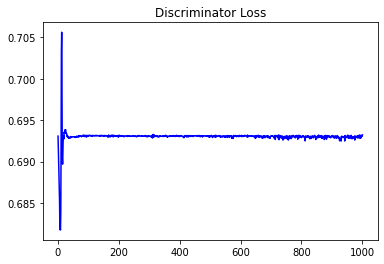

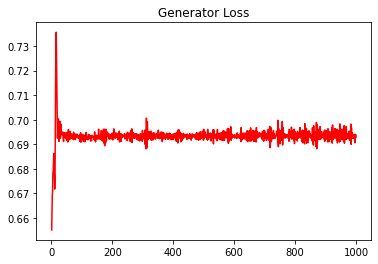

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.015227356232916354


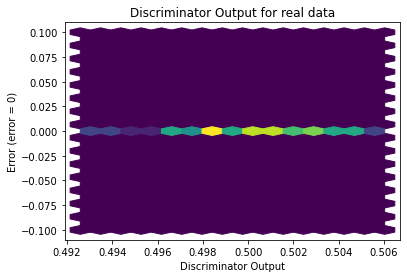

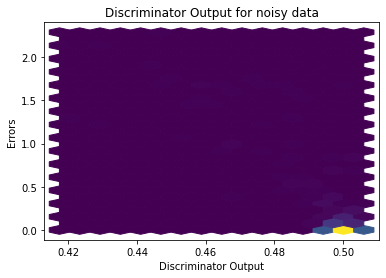

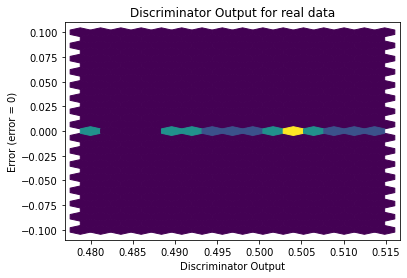

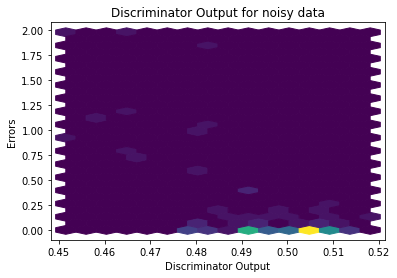

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


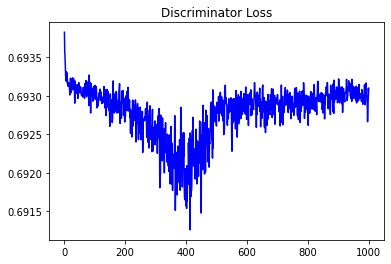

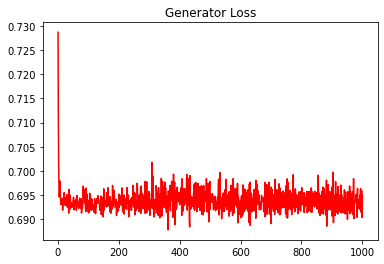

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.006338063963066049


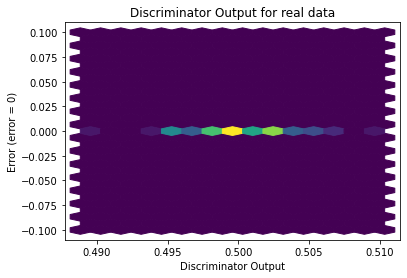

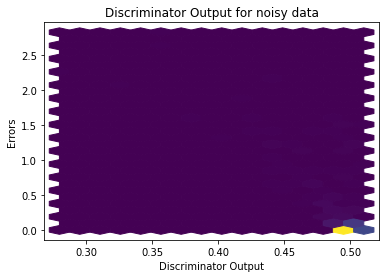

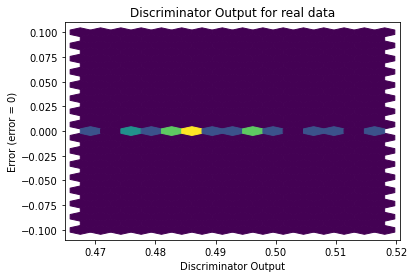

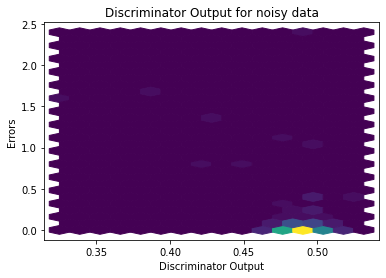

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1498]], requires_grad=True)
